<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


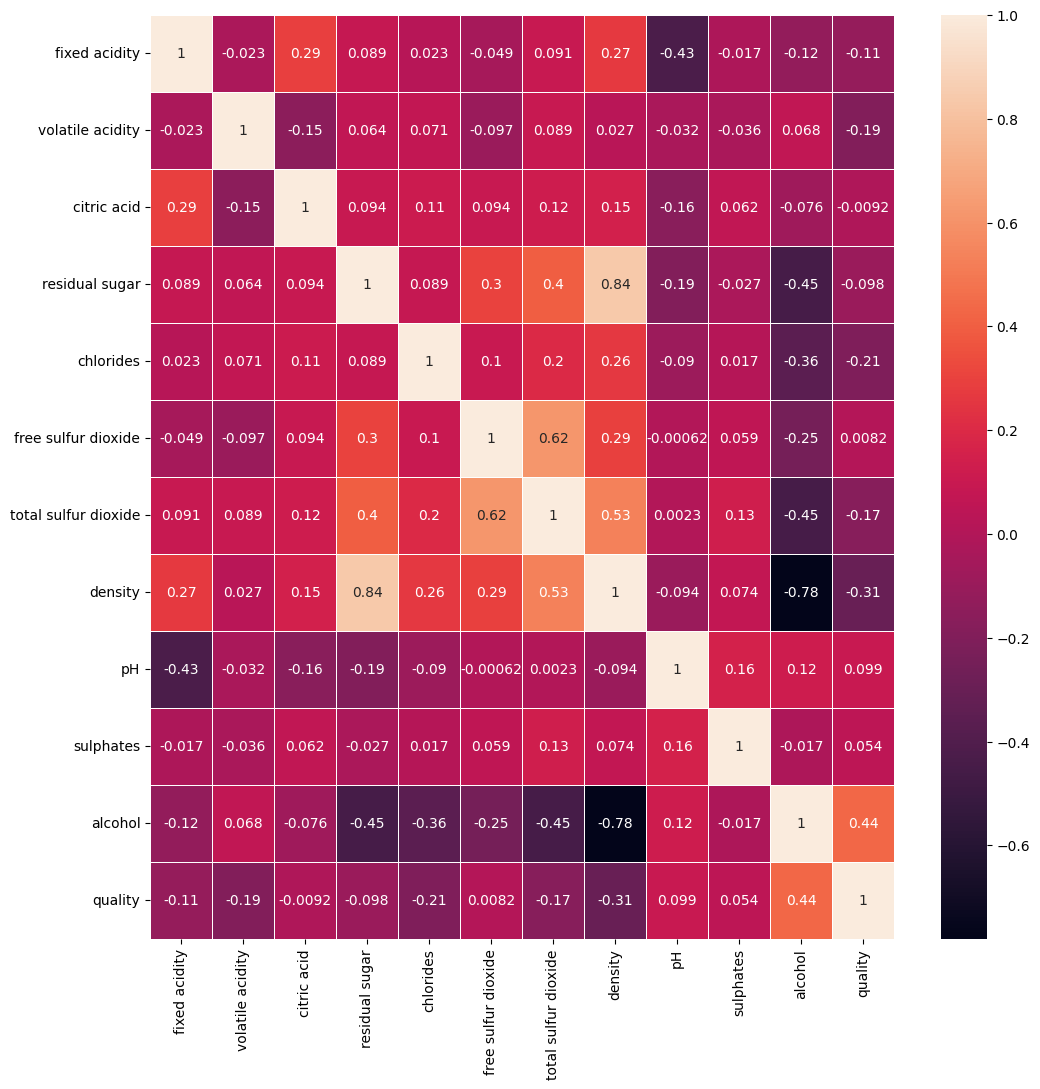


The Accuracy of our classifier is: 77.13041110808602


In [40]:
#SOURCES:
#https://www.tutorialspoint.com/how-to-implement-linear-classification-with-python-scikit-learn
#https://github.com/COSC5557/warmup-Sanjeeb-PL/blob/main/warmup.ipynb
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
#https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeClassifier
import seaborn as sb
from sklearn import metrics
#Put the white wine dataset into a dataframe
path = 'H:\ML\Warmup\Warmup\winequality-white.csv'
wine = pd.read_csv(path, sep=';', header = 'infer')
#Get some info on the wine dataframe
wine.info()
wine.describe().T

x_train, x_test, y_train, y_test = train_test_split(wine, qualityCol, train_size=.75, shuffle=True,random_state=0)
x_train.shape, x_test.shape
#create linear regression object
regModel = linear_model.LinearRegression()
#train the model
regModel.fit(x_train, y_train)
#make predictions
y_pred = regModel.predict(x_test)

plt.figure(figsize = (12,12))
sb.heatmap(wine.corr(), linewidths=0.5, annot=True)
plt.show()

# Standarize the features
scaler = StandardScaler().fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

clfModel = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clfModel.fit(x_train, y_train)
y_pred = clfModel.predict(x_test)

y_acc = clfModel.predict(x_train)
print ("\nThe Accuracy of our classifier is:", metrics.accuracy_score(y_train, y_acc)*100)